In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part 1 : Exploratory Data Analysis(EDA)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

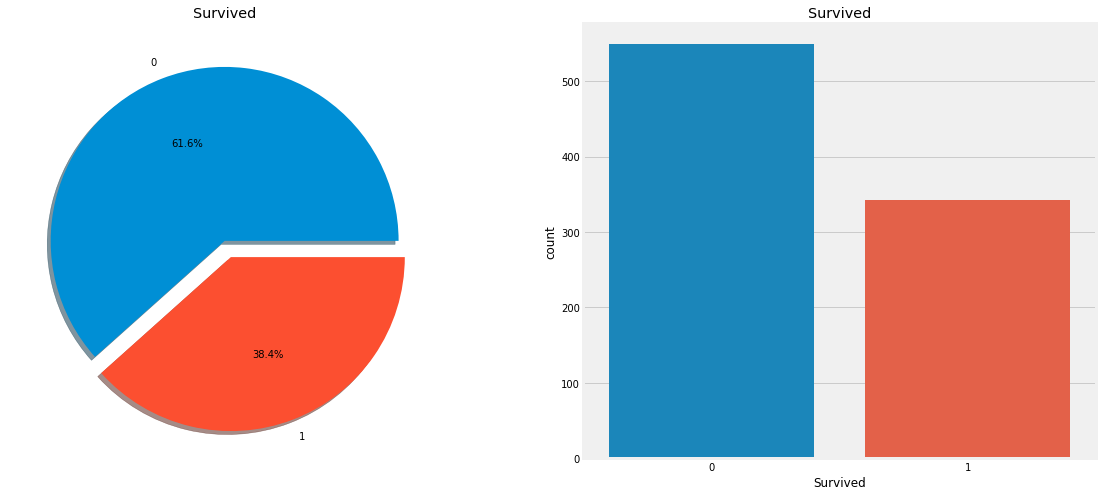

In [5]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%',
                                        ax = ax[0],shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data= data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

#0(죽은 사람)의 비율이 1(산 사람)의 비율보다 크다.

We need to dig down more to get better insights from the data
and see which categories of the passengers did survived and who didn't.

### Categorical Features : Sex, Embarked
a categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
   #### cannot sort or give any ordering to such variables.

### Ordinal Features : PClass
   #### can have relative ordering and sorting between the values.

### Continous Features : Age

## Categorical Feature : Sex

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()
#사망/생존 인원 수 센다

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
data[['Sex','Survived']].groupby(['Sex']).mean()
#성별 생존율

,Survived
Sex,
female,0.742038
male,0.188908


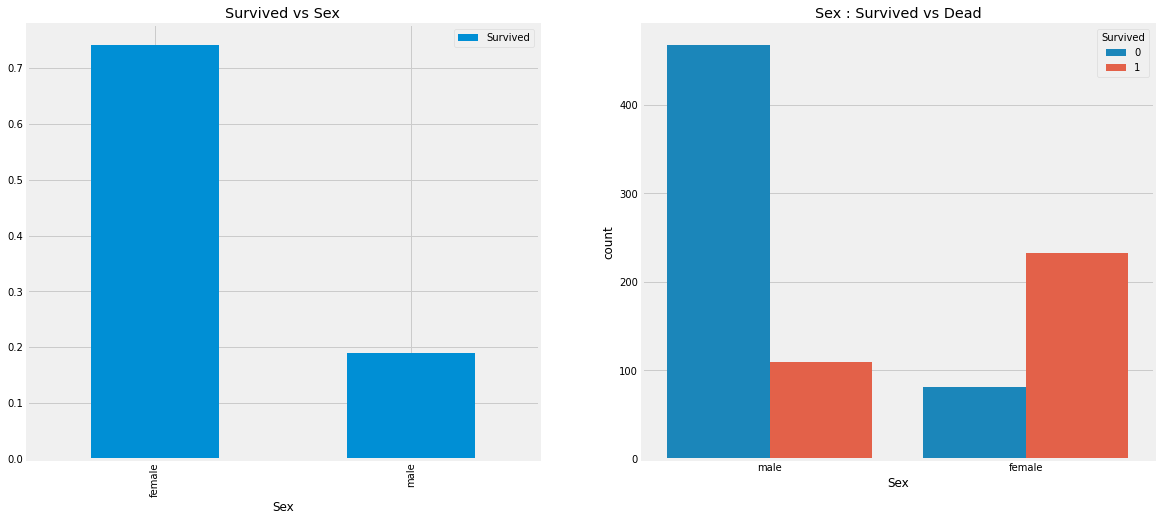

In [8]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data =data, ax= ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

## Ordinal Feauture : PClass

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


TypeError: set_title() missing 1 required positional argument: 'label'

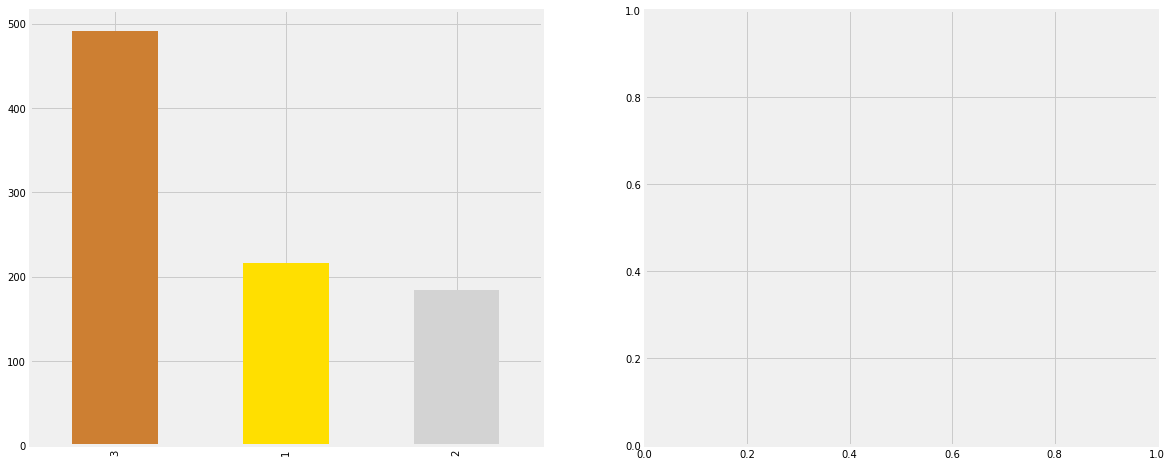

In [10]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title()